# TITANIC

Francisco Rosa Dias de Miranda

Competição do kaggle

In [39]:
# import data science libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.linear_model as lm
import sklearn.ensemble as ens
import mlxtend as ml
import missingno as msno

In [40]:
# import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
passa = test.PassengerId

## EDA

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
# explore data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

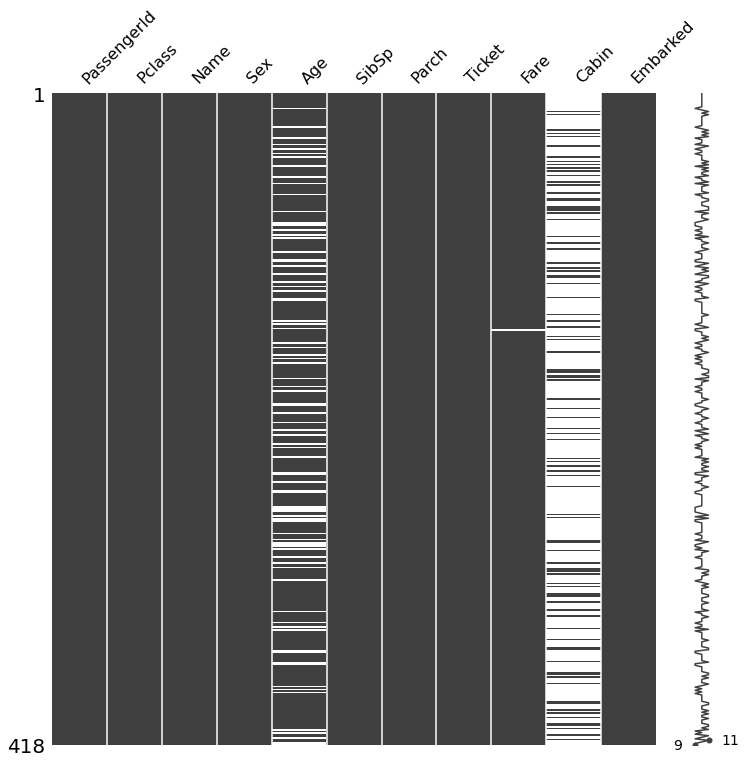

In [44]:
# missing data
msno.matrix(test, figsize=(12,12))

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

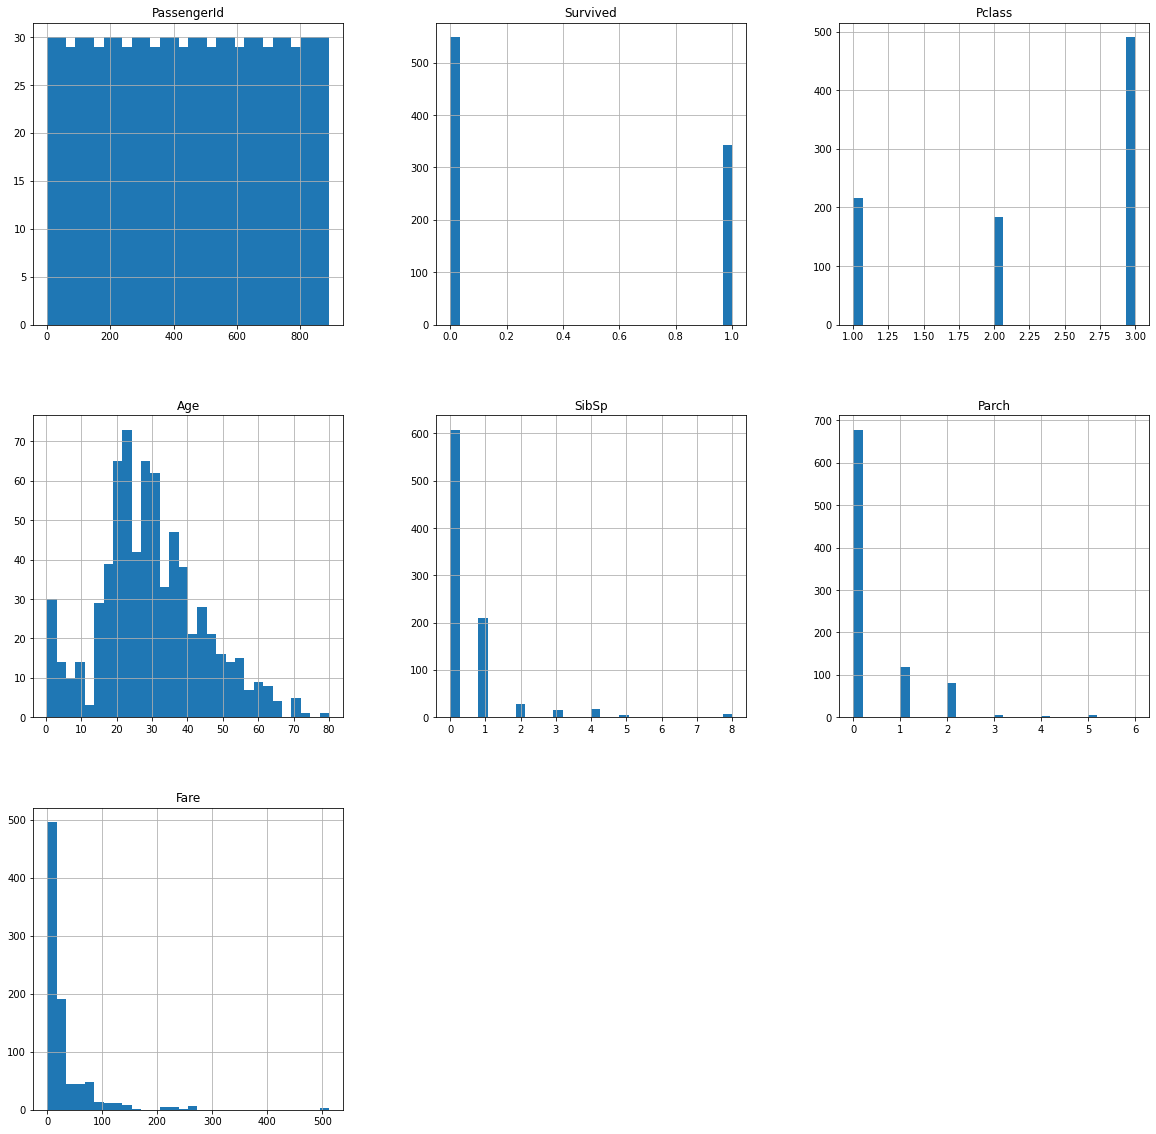

In [45]:
# histograms for numeric data
train.hist(figsize=(20,20), bins = 30)
           

<AxesSubplot:>

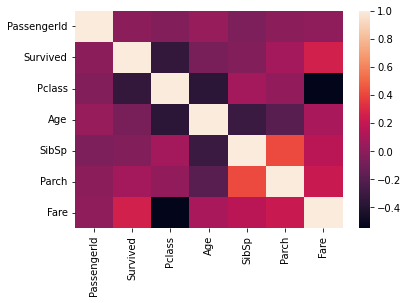

In [46]:
# variable correlation
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
            

In [47]:
# column names
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Preprocess

In [48]:
# DEAL WITH NANs

#inputing nan in Age
train['Age'].fillna(train['Age'].mean(), inplace=True)

#inputing nan in Age
test['Age'].fillna(test['Age'].mean(), inplace=True)


#inputing nan in Age
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [49]:
# TRAIN
# dummy variables for embarked, pclass and sex  
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train['Pclass'], drop_first=True)
sex = pd.get_dummies(train['Sex'], drop_first=True)

# select features
features = ['Age', 'SibSp', 'Parch', 'Fare']


# combine the dummy variables
X = pd.concat([train[features], embarked, pclass], axis=1)
y = train['Survived']


In [50]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [51]:
# TEST
# dummy variables for embarked, pclass and sex  
embarked = pd.get_dummies(test['Embarked'], drop_first=True)
pclass = pd.get_dummies(test['Pclass'], drop_first=True)
sex = pd.get_dummies(test['Sex'], drop_first=True)

# combine the dummy variables
test = pd.concat([test[features], embarked, pclass], axis=1)

In [52]:
X

,Age,SibSp,Parch,Fare,Q,S,2,3
0,22.000000,1,0,7.2500,0,1,0,1
1,38.000000,1,0,71.2833,0,0,0,0
2,26.000000,0,0,7.9250,0,1,0,1
3,35.000000,1,0,53.1000,0,1,0,0
4,35.000000,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,1,0
887,19.000000,0,0,30.0000,0,1,0,0
888,29.699118,1,2,23.4500,0,1,0,1
889,26.000000,0,0,30.0000,0,0,0,0


## Modelling

### Model 1: Ensemble vote classifier

In [61]:
import sklearn.neural_network as nn
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.gridspec as gridspec
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import itertools
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.plotting import plot_decision_regions

In [54]:
# make a multiple classifier model pipeline


#inicializing classifiers

clf1 = lm.LogisticRegression(solver = 'sag')
clf2 = ens.RandomForestClassifier()
clf3 = ens.GradientBoostingClassifier()
clf4 = ens.AdaBoostClassifier()
clf5 = ens.BaggingClassifier()
clf6 = ens.ExtraTreesClassifier()
clf7 = sk.svm.SVC()
clf8 = sk.neighbors.KNeighborsClassifier()
clf9 = nn.MLPClassifier()
# decision tree
clf10 = sk.tree.DecisionTreeClassifier()
# xdgboost
clf11 = xgb.XGBClassifier()
# naive bayes
clf12 = gnb()
# lda
clf13 = LDA()
# qda
clf14 = QDA()
# SHAP
clf15 = ens.ExtraTreesClassifier()

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, clf10, clf11, clf12, clf13, clf14, clf15], voting='hard')


In [58]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(test)

# Chosing axes for decision regions
X_t = sk.preprocessing.StandardScaler().fit_transform(X[['Fare', 'Age']])


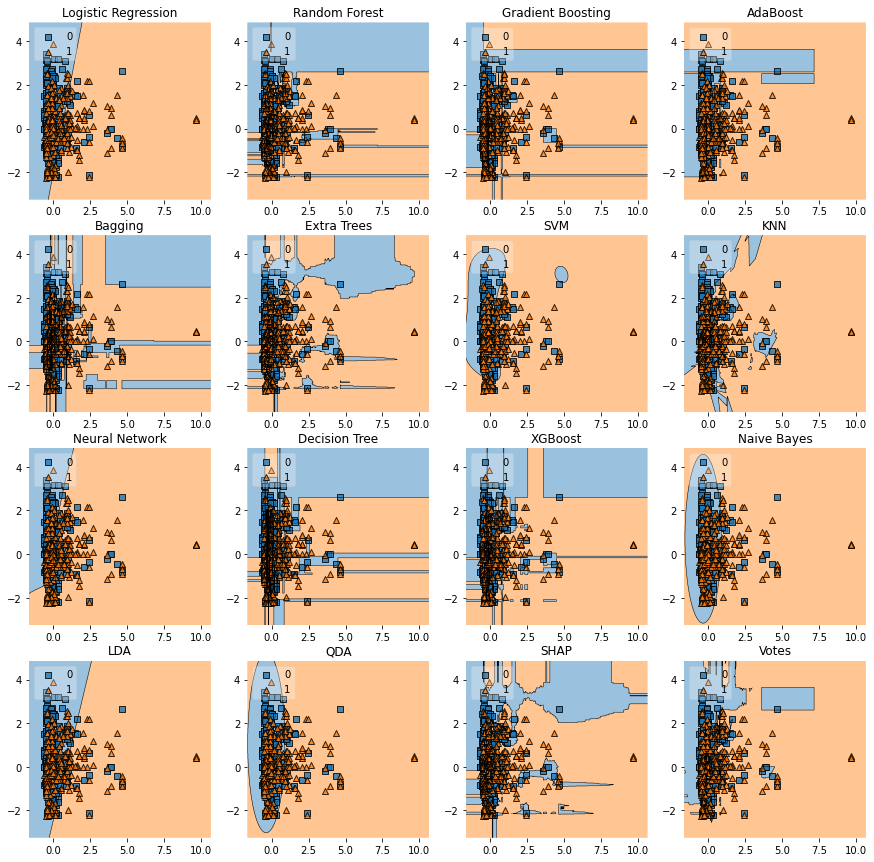

In [18]:
# Plotting decision regions

gs = gridspec.GridSpec(4, 4)
fig = plt.figure(figsize=(15,15))

labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'Bagging',
 'Extra Trees', 'SVM', 'KNN', 'Neural Network', 'Decision Tree', 'XGBoost', 'Naive Bayes', 'LDA', 'QDA', 'SHAP', 'Votes']


for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, clf10, clf11, clf12, clf13, clf14, clf15, eclf], labels,
                         itertools.product([0, 1, 2, 3],
                         repeat=2)):

    clf.fit(X_t, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_t, y=np.array(y), clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [ ]:
# fit the eclf model
eclf.fit(X, y)

/home/chico/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='sag')

In [ ]:
sfs1 = SFS(eclf, 
           k_features=(1, 8), 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           n_jobs=-1,
           cv=5)

best combination (ACC: 0.718): (1, 2, 3, 6, 7)

best combination (ACC: 0.718): ('SibSp', 'Parch', 'Fare', 2, 3)



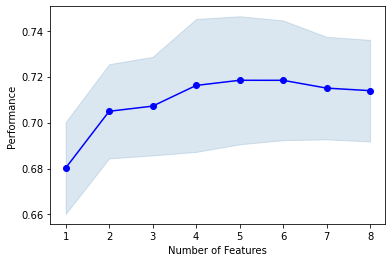

In [ ]:
sfs1 = sfs1.fit(X, y)

print('best combination (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print('best combination (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_names_))

plot_sfs(sfs1.get_metric_dict(), kind='std_err');

In [ ]:
X_train_sfs = sfs1.transform(X)
X_test_sfs = sfs1.transform(test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
eclf.fit(X_train_sfs, y)
y_pred = eclf.predict(X_test_sfs)

/home/chico/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/chico/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:27:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### sending to kaggle

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#bind test data to submission file
submission = pd.DataFrame({
        "PassengerId": passa,
        "Survived": y_pred
    })

# save the submission file
submission.to_csv('submission.csv', index=False)
# score: 0.69

In [ ]:
#!kaggle competitions submit -c titanic -f submission.csv -m "primeira tentativa - catboost

### Model 2: pycaret

In [ ]:

# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = train, target = 'Survived', imputation_type='iterative', n_jobs=-1, remove_multicollinearity = True,
    multicollinearity_threshold = 0.95, 
    fix_imbalance = True)
# return best model
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8425,0.8869,0.7370,0.8282,0.7774,0.6563,0.6613,3.0320
gbc,Gradient Boosting Classifier,0.8345,0.8859,0.7582,0.7911,0.7730,0.6429,0.6445,0.1450
xgboost,Extreme Gradient Boosting,0.8297,0.8737,0.7543,0.7915,0.7696,0.6348,0.6382,13.2390
rf,Random Forest Classifier,0.8249,0.8629,0.7585,0.7712,0.7628,0.6242,0.6262,0.2910
lightgbm,Light Gradient Boosting Machine,0.8200,0.8740,0.7455,0.7721,0.7564,0.6139,0.6162,0.0860
ada,Ada Boost Classifier,0.8136,0.8496,0.7667,0.7453,0.7538,0.6041,0.6063,0.1270
lda,Linear Discriminant Analysis,0.8136,0.8649,0.7629,0.7503,0.7532,0.6039,0.6075,0.0330
ridge,Ridge Classifier,0.8120,0.0000,0.7629,0.7468,0.7511,0.6006,0.6045,0.0340
lr,Logistic Regression,0.8089,0.8749,0.7842,0.7290,0.7538,0.5983,0.6012,0.1790
et,Extra Trees Classifier,0.8025,0.8333,0.7284,0.7422,0.7320,0.5760,0.5792,0.2460


In [ ]:
dt = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.9263,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.8889,0.8729,0.7500,0.9474,0.8372,0.7546,0.7665
2,0.9206,0.9511,0.8696,0.9091,0.8889,0.8272,0.8277
3,0.8387,0.8740,0.7391,0.8095,0.7727,0.6481,0.6497
4,0.8226,0.8924,0.7826,0.7500,0.7660,0.6232,0.6236
5,0.7581,0.8428,0.6957,0.6667,0.6809,0.4862,0.4865
6,0.8065,0.8450,0.6957,0.7619,0.7273,0.5778,0.5792
7,0.8226,0.8528,0.6087,0.8750,0.7179,0.5945,0.6154
8,0.8548,0.9086,0.7391,0.8500,0.7907,0.6804,0.6843
9,0.8710,0.9030,0.7391,0.8947,0.8095,0.7133,0.7207


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8730,0.9220,0.7917,0.8636,0.8261,0.7264,0.7281
1,0.8730,0.8761,0.7917,0.8636,0.8261,0.7264,0.7281
2,0.9365,0.9500,0.8696,0.9524,0.9091,0.8605,0.8626
3,0.8065,0.8935,0.6957,0.7619,0.7273,0.5778,0.5792
4,0.8065,0.9208,0.7826,0.7200,0.7500,0.5926,0.5939
5,0.7581,0.8378,0.7391,0.6538,0.6939,0.4951,0.4977
6,0.8065,0.7938,0.6522,0.7895,0.7143,0.5699,0.5759
7,0.8387,0.8395,0.6522,0.8824,0.7500,0.6349,0.6507
8,0.8387,0.9281,0.6957,0.8421,0.7619,0.6416,0.6483
9,0.8548,0.9136,0.7826,0.8182,0.8000,0.6862,0.6866


In [ ]:
final_dt = finalize_model(tuned_dt)

In [ ]:
predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7836,0.8353,0.6364,0.7955,0.7071,0.5388,0.5472


,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Embarked_C,Embarked_Q,Embarked_S,Survived,Label,Score
0,29.699118,52.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.5522
1,34.000000,21.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8334
2,30.000000,10.500000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.7559
3,22.000000,8.050000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9485
4,24.000000,16.700001,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0.5296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,31.000000,164.866699,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9272
264,70.000000,10.500000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8329
265,24.000000,247.520798,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.5223
266,29.699118,7.775000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0.9002


In [ ]:
unseen_predictions = predict_model(final_dt, data=test)

In [ ]:
unseen_predictions[['PassengerId', 'Label']]

,PassengerId,Label
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


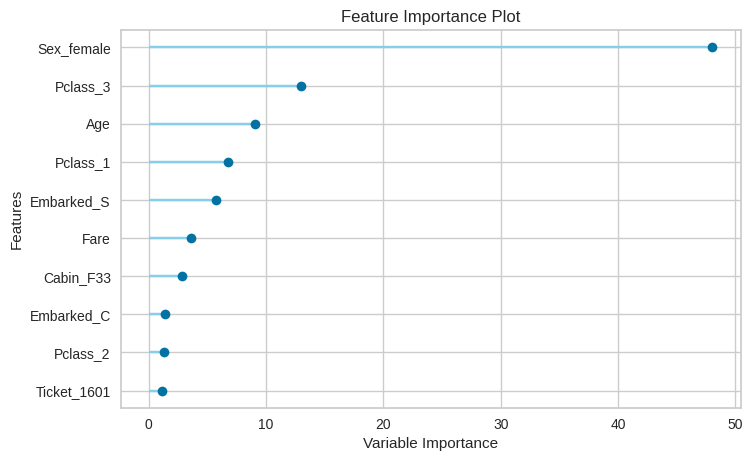

In [63]:
plot_model(final_dt, plot='feature')

In [ ]:
#bind test data to submission file
submission = pd.DataFrame({
        "PassengerId": unseen_predictions.PassengerId,
        "Survived": unseen_predictions.Label
    })

# save the submission file
submission.to_csv('submission.csv', index=False)

#score: 0.77

In [ ]:
save_model(final_dt,'Final catboost Model nov21')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['PassengerId'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Survived',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type='gbdt',
                                                              class_weight=None,
                                                              c...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'),
                 ('fix_multi',
                  Fix_multicollinearity(correlation_with_target_preference=

## Referências

    - Ciência de Dados. Francisco Aparecido Rodrigues. https://github.com/franciscoicmc/ciencia-de-dados
    - PyCaret.org. PyCaret, April 2020. URL https://pycaret.org/about. PyCaret version 1.0.0.
    - Raschka, Sebastian (2018) MLxtend: Providing machine learning and data science utilities and extensions to Python's scientific computing stack.
J Open Source Softw 3(24).
